# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 500)

# Dataset Overview

In [65]:
df = pd.read_csv('train 2.csv')
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,...,num_op_var40_efect_ult1,num_op_var40_efect_ult3,num_op_var41_comer_ult1,num_op_var41_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_reemb_var13_hace3,num_reemb_var13_ult1,num_reemb_var17_hace3,num_reemb_var17_ult1,num_reemb_var33_hace3,num_reemb_var33_ult1,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_trasp_var17_in_hace3,num_trasp_var17_in_ult1,num_trasp_var17_out_hace3,num_trasp_var17_out_ult1,num_trasp_var33_in_hace3,num_trasp_var33_in_ult1,num_trasp_var33_out_hace3,num_trasp_var33_out_ult1,num_venta_var44_hace3,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_var2_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,88.89,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.18,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0

In [5]:
print('Dataset has', df.shape[0], 'Rows and', df.shape[1], 'Columns')

Dataset has 76020 Rows and 371 Columns


## General Overview

In [9]:
# Check missing values and duplicate
print('Missing Values : ', df.isna().sum())

Missing Values :  ID                               0
var3                             0
var15                            0
imp_ent_var16_ult1               0
imp_op_var39_comer_ult1          0
imp_op_var39_comer_ult3          0
imp_op_var40_comer_ult1          0
imp_op_var40_comer_ult3          0
imp_op_var40_efect_ult1          0
imp_op_var40_efect_ult3          0
imp_op_var40_ult1                0
imp_op_var41_comer_ult1          0
imp_op_var41_comer_ult3          0
imp_op_var41_efect_ult1          0
imp_op_var41_efect_ult3          0
imp_op_var41_ult1                0
imp_op_var39_efect_ult1          0
imp_op_var39_efect_ult3          0
imp_op_var39_ult1                0
imp_sal_var16_ult1               0
ind_var1_0                       0
ind_var1                         0
ind_var2_0                       0
ind_var2                         0
ind_var5_0                       0
ind_var5                         0
ind_var6_0                       0
ind_var6                         0
in

In [11]:
# check duplicated data 
print('Num Duplicated Values :', df.duplicated().sum())

Num Duplicated Values : 0


## Drop Duplicated Features

In [67]:
# define X and y
x = df.drop(['ID','TARGET'], axis=1) # drop ID and target
y = df['TARGET']

In [68]:
# transpose
x_transp = x.T

# make data frame
x_transp = pd.DataFrame(x_transp)

# check duplicates
print('Num of duplicated features :', x_transp.duplicated().sum())

Num of duplicated features : 62


In [70]:
# assign
duplicated_features = x_transp.duplicated()

# filter
features_to_keep = [not index for index in duplicated_features]

# assign new features
x = x_transp[features_to_keep].T

# Exploratory Data Analysis

In [71]:
# copy data
eda = pd.concat([x,y], axis=1)

# define num
num = eda.select_dtypes(include='number').columns
len(num)

308

## Univariate Analysis

In [79]:
# for visualization we devide our data into 5 parts, its more readable and not cost computation time
num1 = num[:52]
num2 = num[52:104]
num3 = num[104:156]
num4 = num[156:208]
num5 = num[208:260]
num6 = num[260:]

### Descriptive Statistic

In [42]:
eda.describe().T

,count,mean,std,min,25%,50%,75%,max
var3,76020.0,-1.523199e+03,3.903346e+04,-999999.00,2.0000,2.00,2.0000,2.380000e+02
var15,76020.0,3.321287e+01,1.295649e+01,5.00,23.0000,28.00,40.0000,1.050000e+02
imp_ent_var16_ult1,76020.0,8.620827e+01,1.614757e+03,0.00,0.0000,0.00,0.0000,2.100000e+05
imp_op_var39_comer_ult1,76020.0,7.236307e+01,3.393158e+02,0.00,0.0000,0.00,0.0000,1.288803e+04
imp_op_var39_comer_ult3,76020.0,1.195296e+02,5.462663e+02,0.00,0.0000,0.00,0.0000,2.102481e+04
imp_op_var40_comer_ult1,76020.0,3.559130e+00,9.315575e+01,0.00,0.0000,0.00,0.0000,8.237820e+03
imp_op_var40_comer_ult3,76020.0,6.472698e+00,1.537371e+02,0.00,0.0000,0.00,0.0000,1.107357e+04
imp_op_var40_efect_ult1,76020.0,4.129463e-01,3.060486e+01,0.00,0.0000,0.00,0.0000,6.600000e+03
imp_op_var40_efect_ult3,76020.0,5.673524e-01,3.651351e+01,0.00,0.0000,0.00,0.0000,6.600000e+03
imp_op_var40_ult1,76020.0,3.160715e+00,9.526820e+01,0.00,0.0000,0.00,0.0000,8.237820e+03


### Violinplot

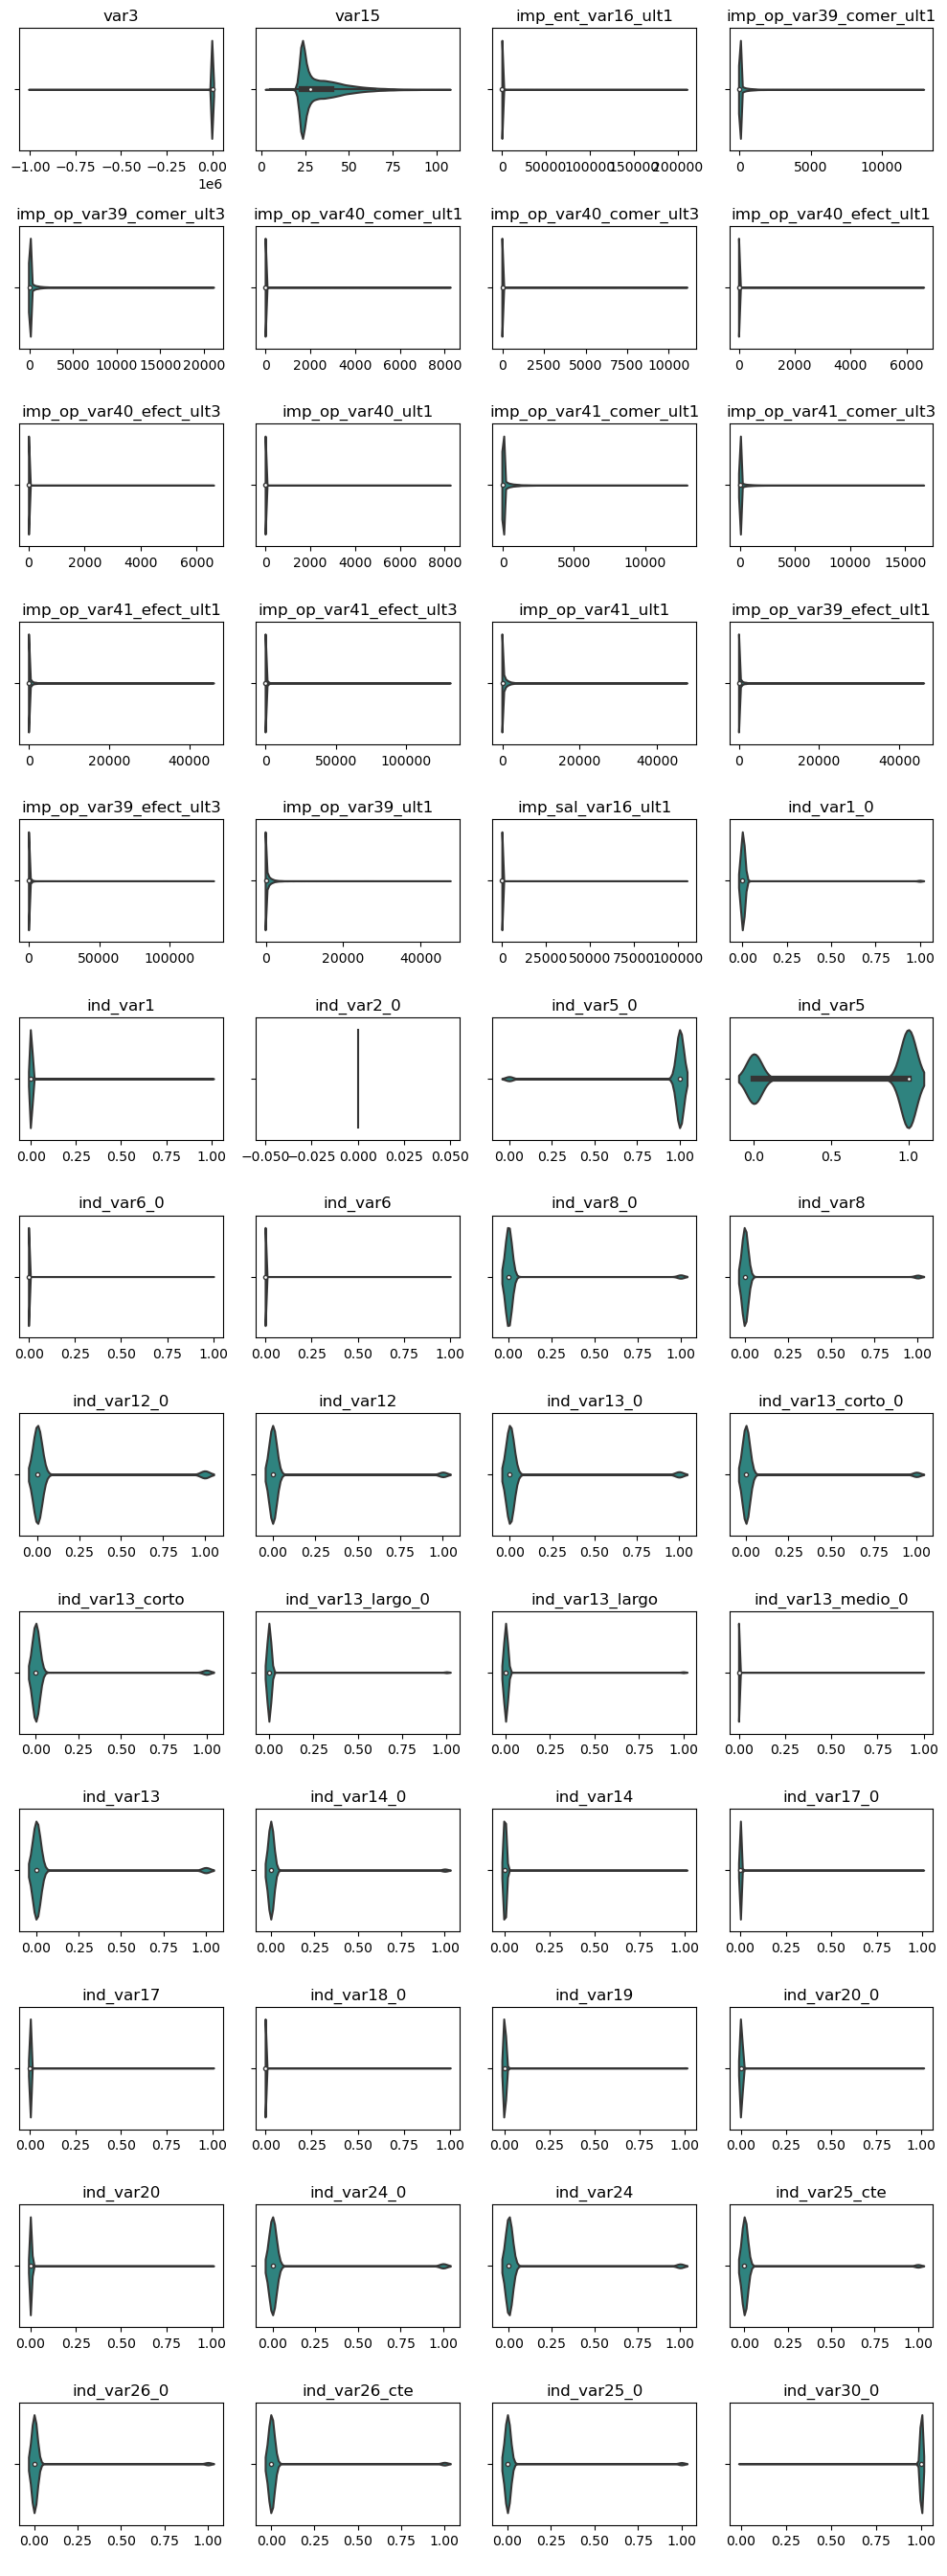

In [81]:
plt.figure(figsize=(10,27))
for i in range(0, len(num1)):
    plt.subplot(13,4,i+1)
    sns.violinplot(x=eda[num1[i]], palette='viridis')
    plt.title(num1[i], fontsize=12)
    plt.xlabel(' ')
    plt.tight_layout()

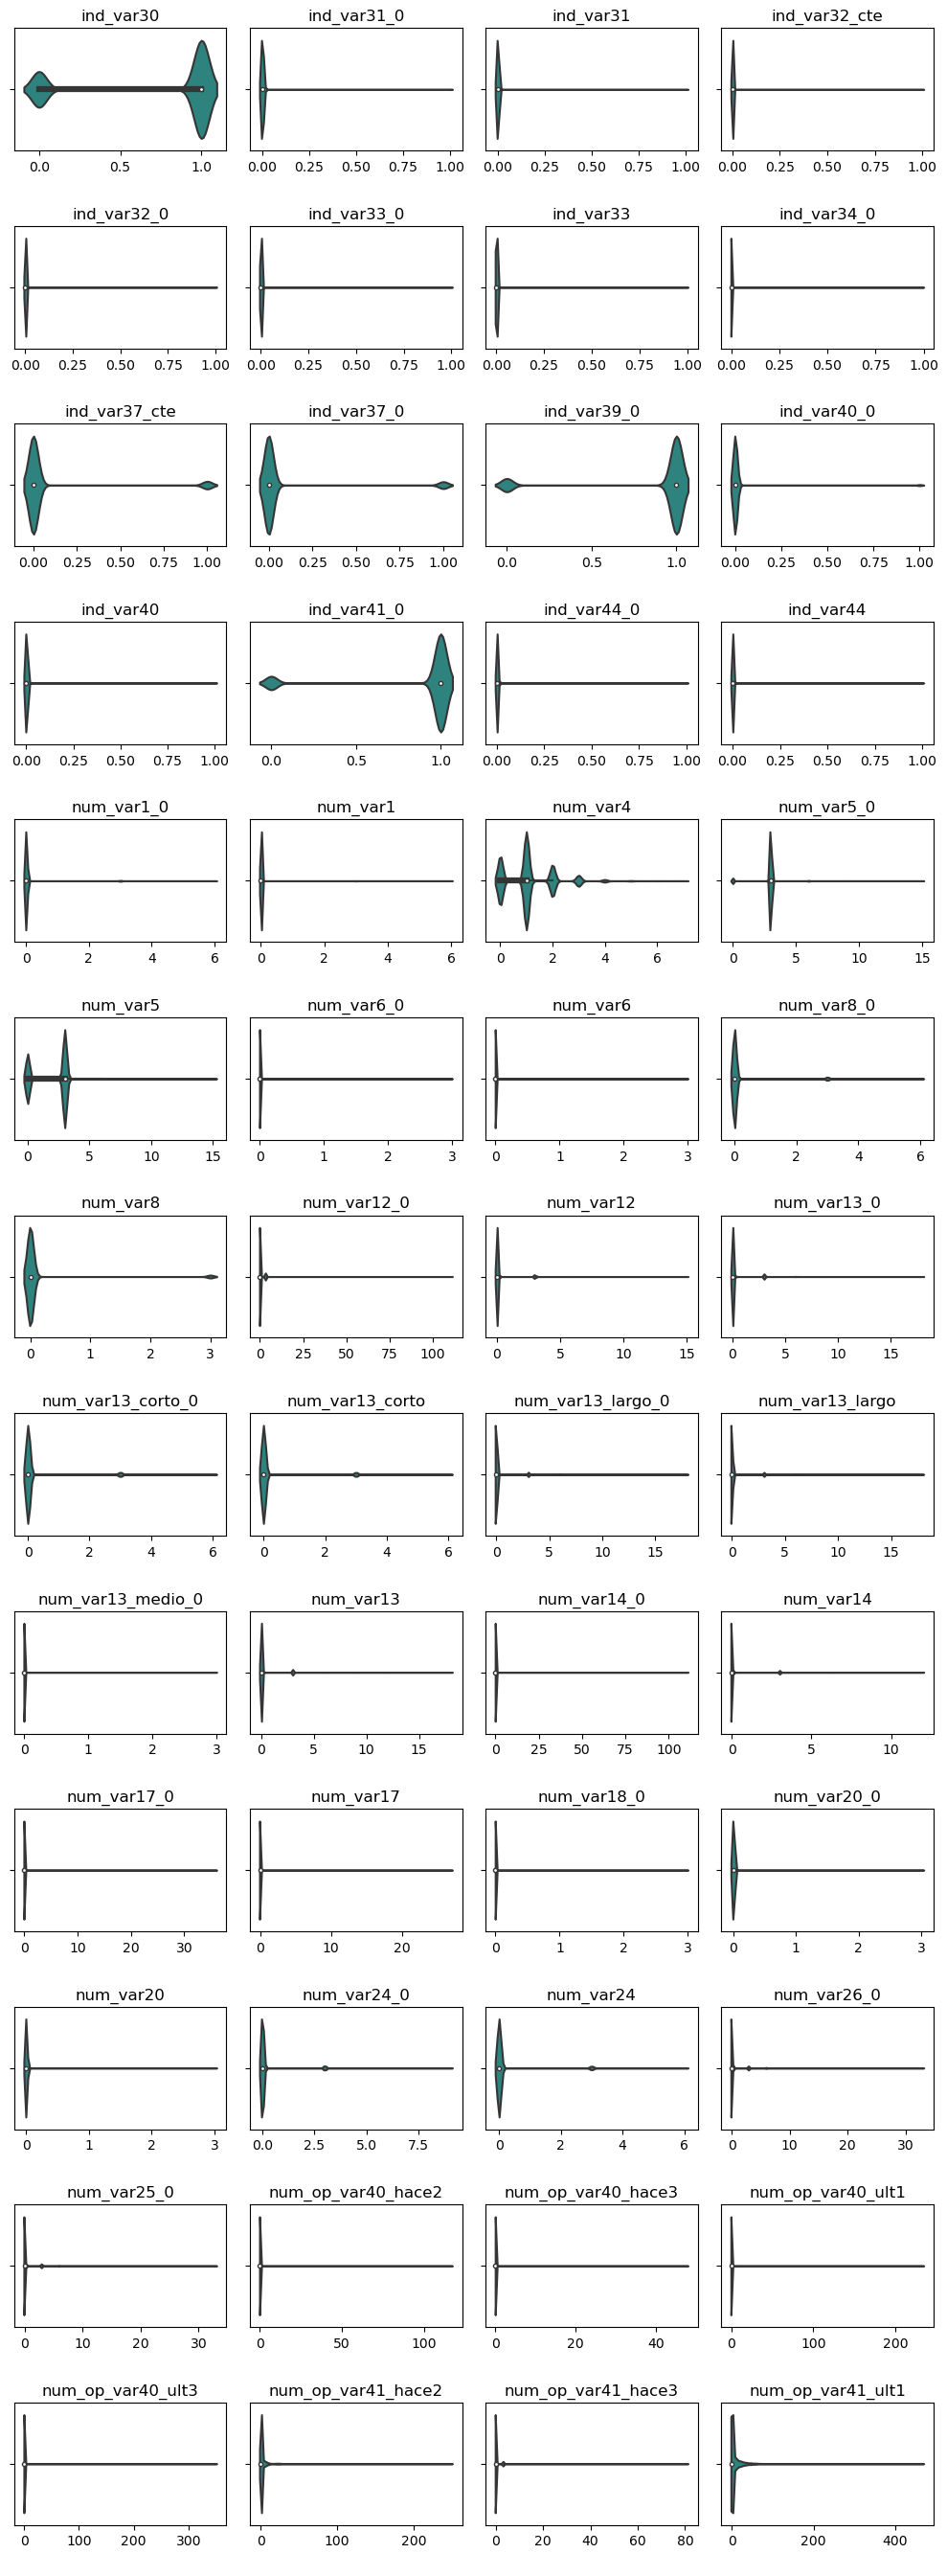

In [82]:
plt.figure(figsize=(10,27))
for i in range(0, len(num2)):
    plt.subplot(13,4,i+1)
    sns.violinplot(x=eda[num2[i]], palette='viridis')
    plt.title(num2[i], fontsize=12)
    plt.xlabel(' ')
    plt.tight_layout()

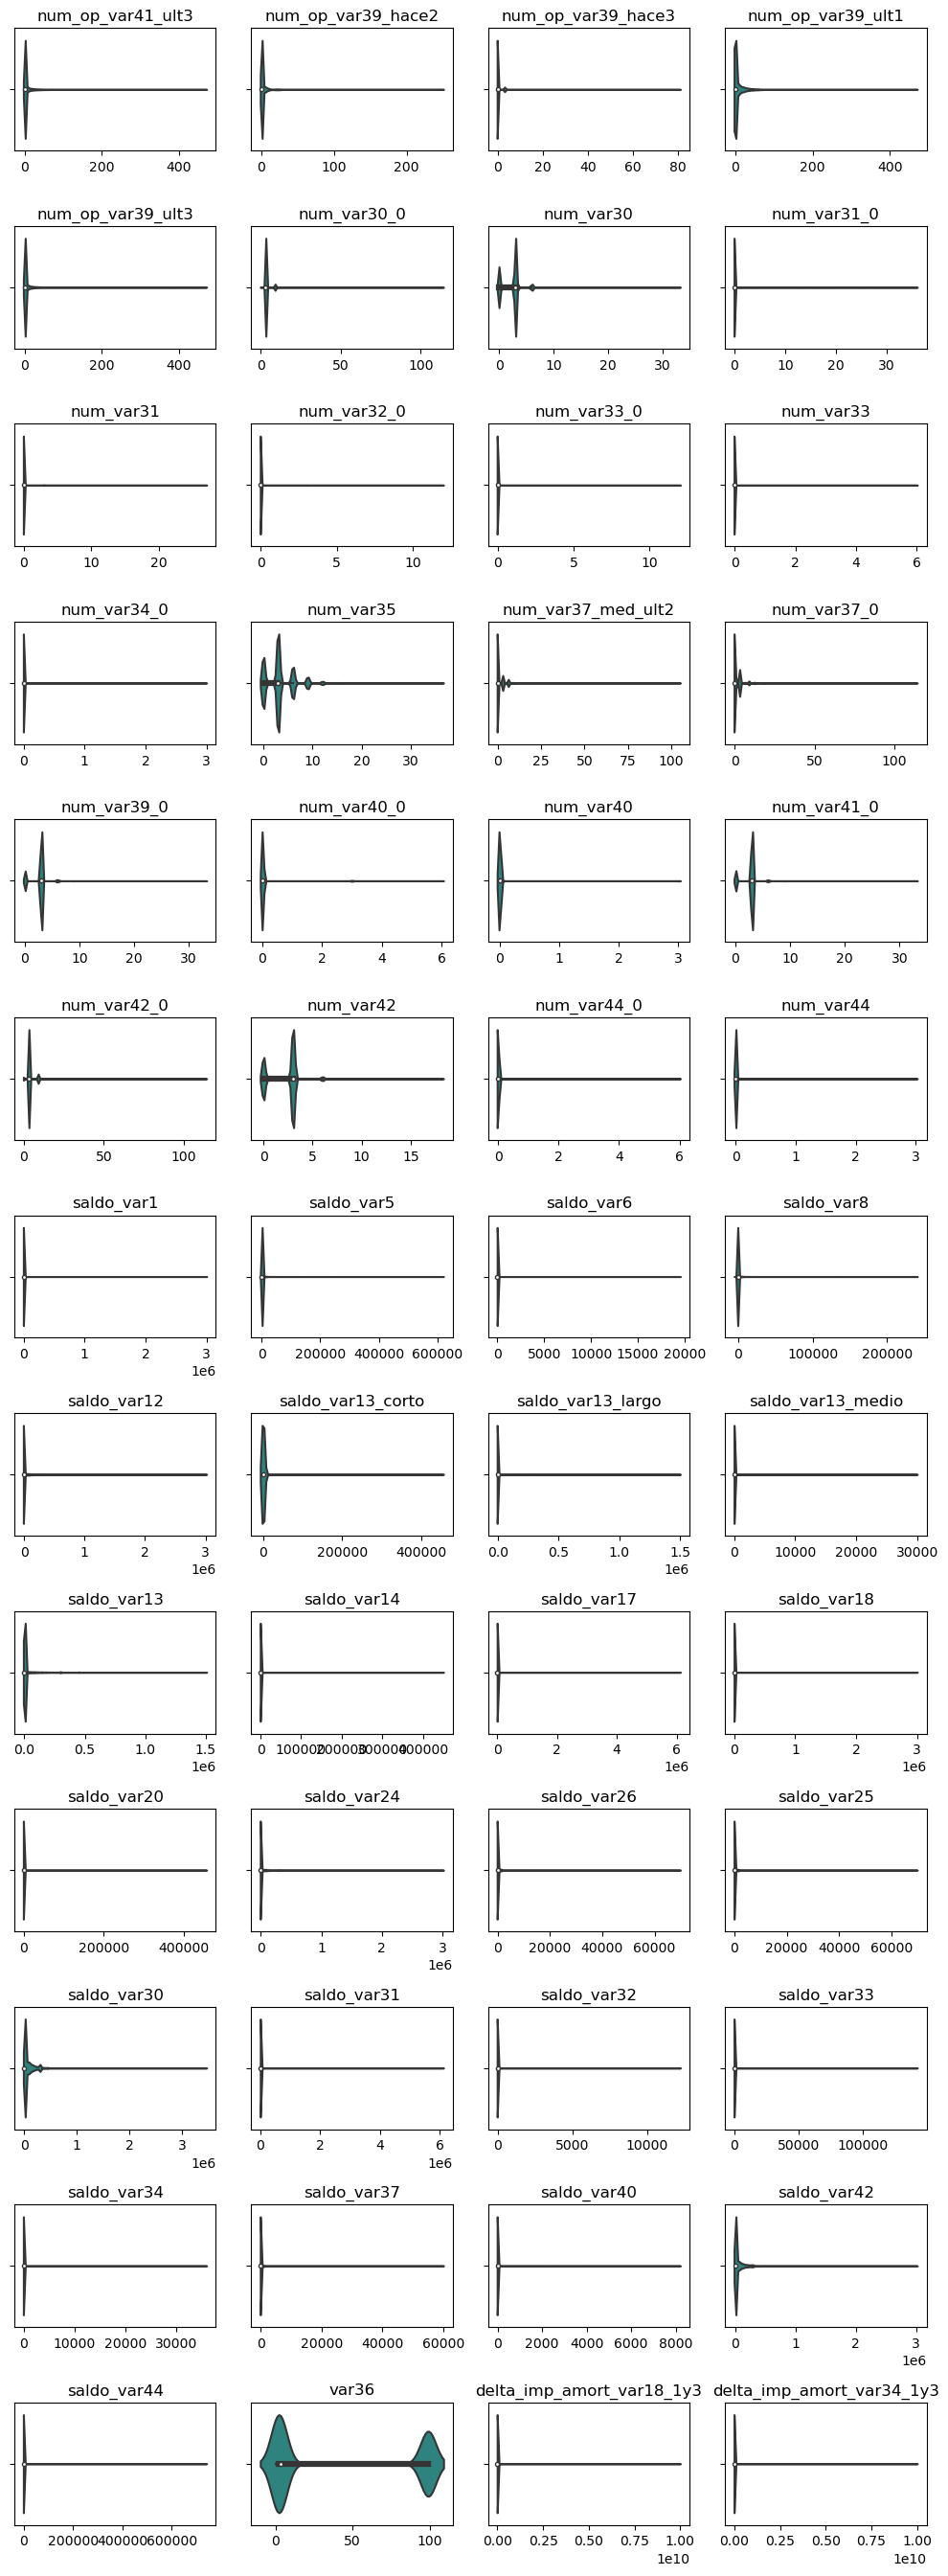

In [83]:
plt.figure(figsize=(10,27))
for i in range(0, len(num3)):
    plt.subplot(13,4,i+1)
    sns.violinplot(x=eda[num3[i]], palette='viridis')
    plt.title(num3[i], fontsize=12)
    plt.xlabel(' ')
    plt.tight_layout()

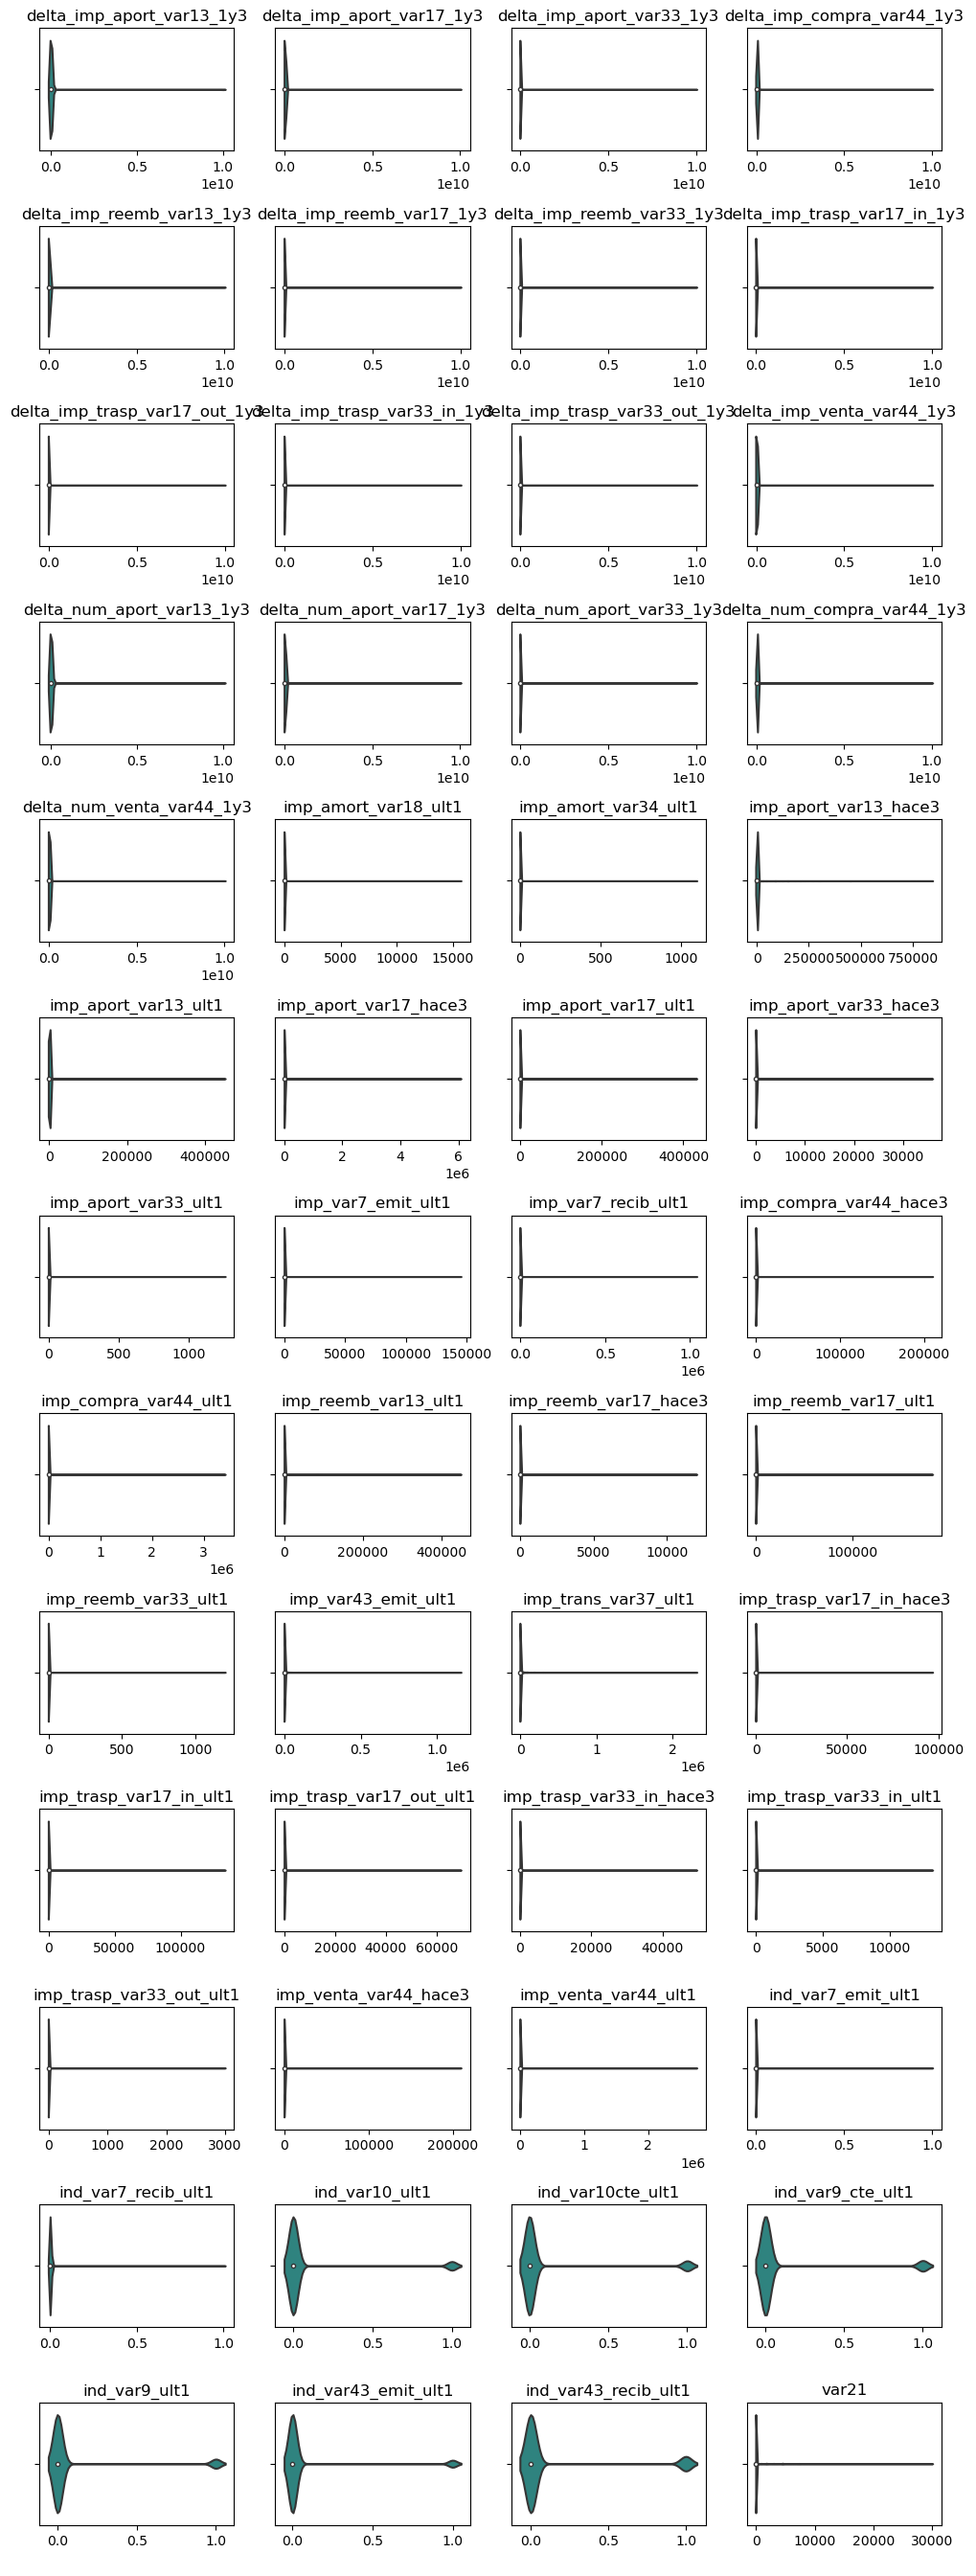

In [84]:
plt.figure(figsize=(10,27))
for i in range(0, len(num4)):
    plt.subplot(13,4,i+1)
    sns.violinplot(x=eda[num4[i]], palette='viridis')
    plt.title(num4[i], fontsize=12)
    plt.xlabel(' ')
    plt.tight_layout()

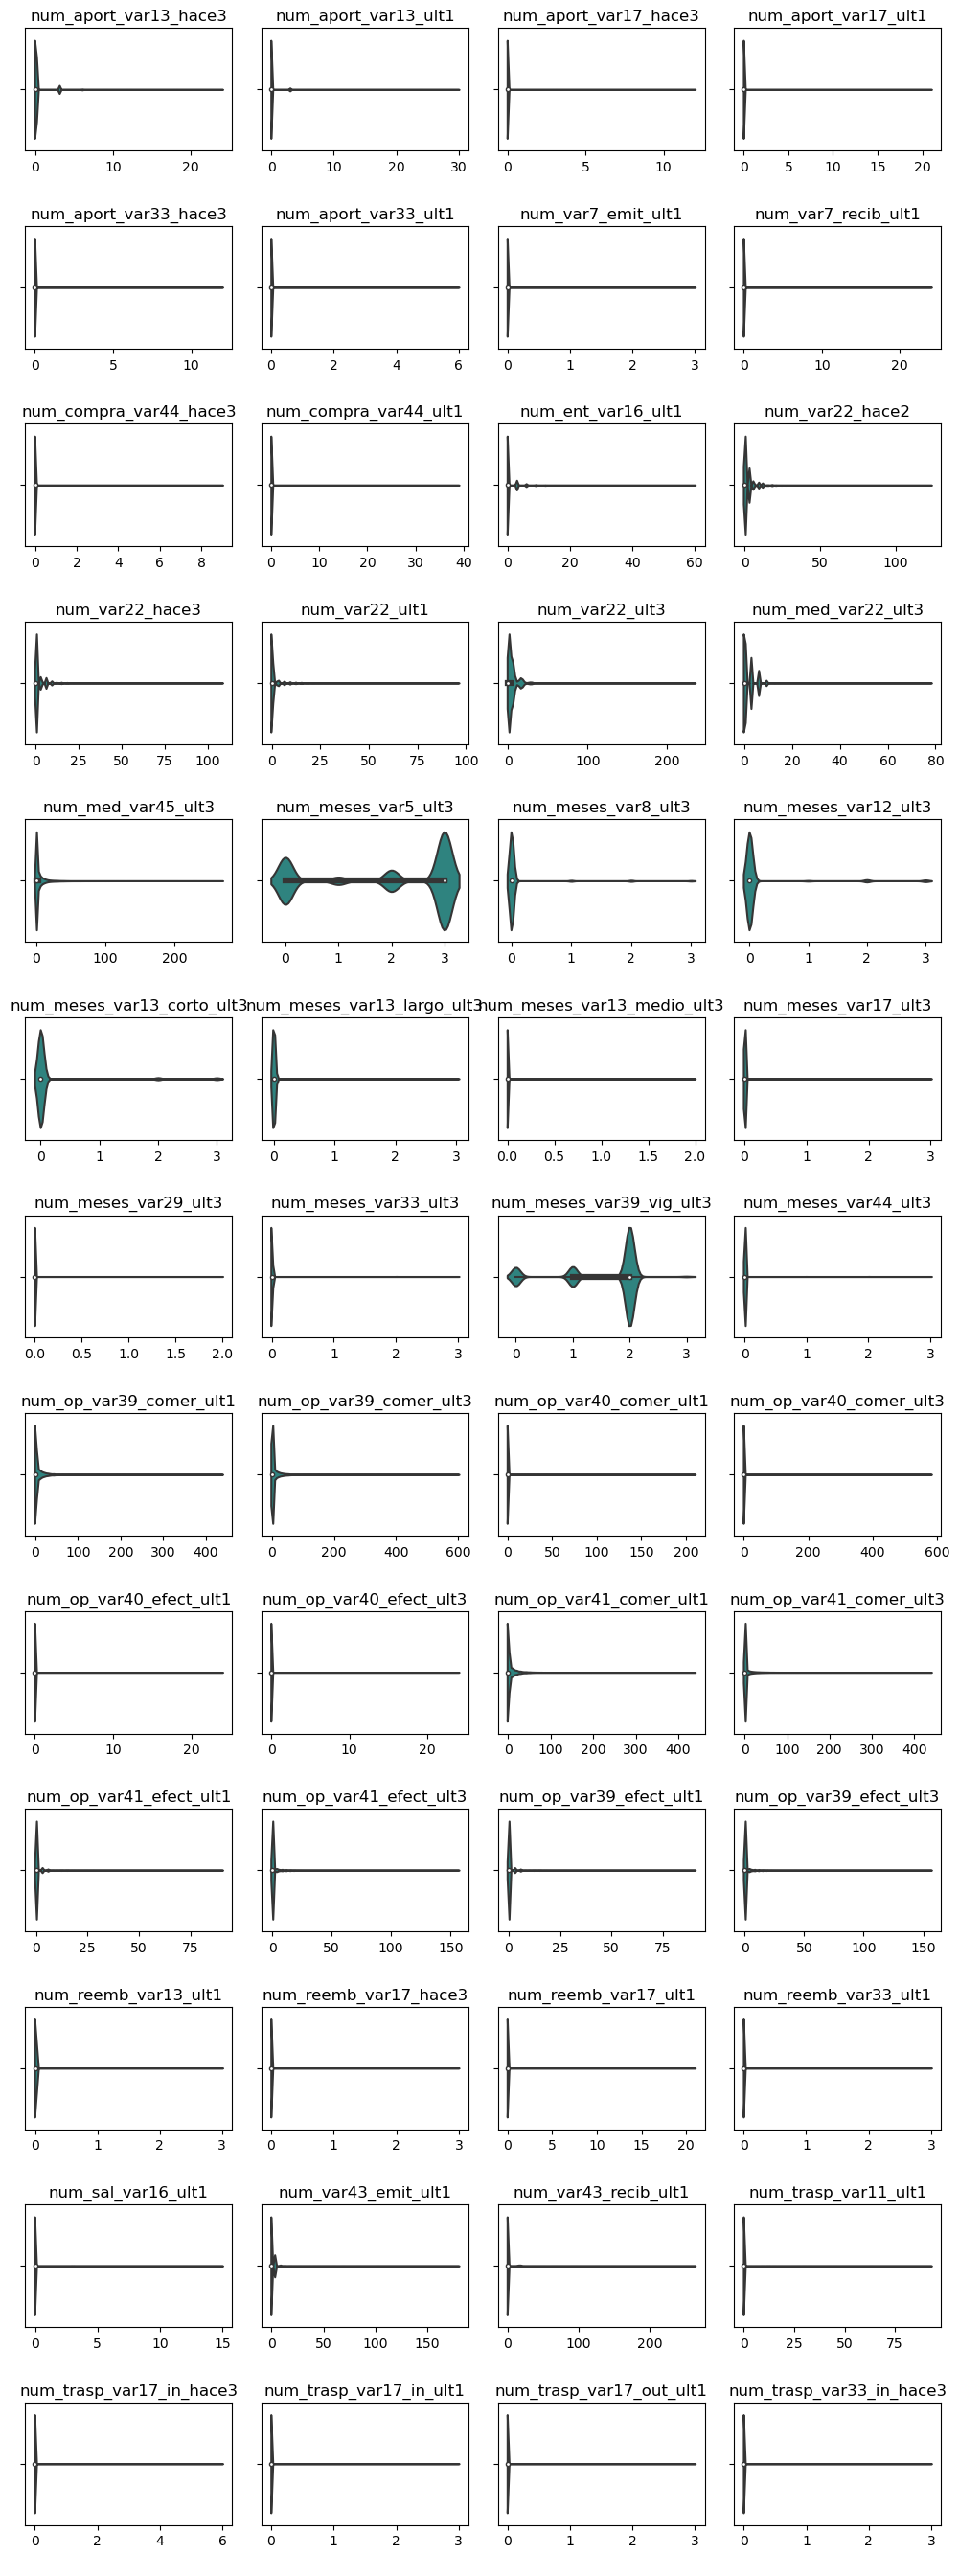

In [85]:
plt.figure(figsize=(10,27))
for i in range(0, len(num5)):
    plt.subplot(13,4,i+1)
    sns.violinplot(x=eda[num5[i]], palette='viridis')
    plt.title(num5[i], fontsize=12)
    plt.xlabel(' ')
    plt.tight_layout()

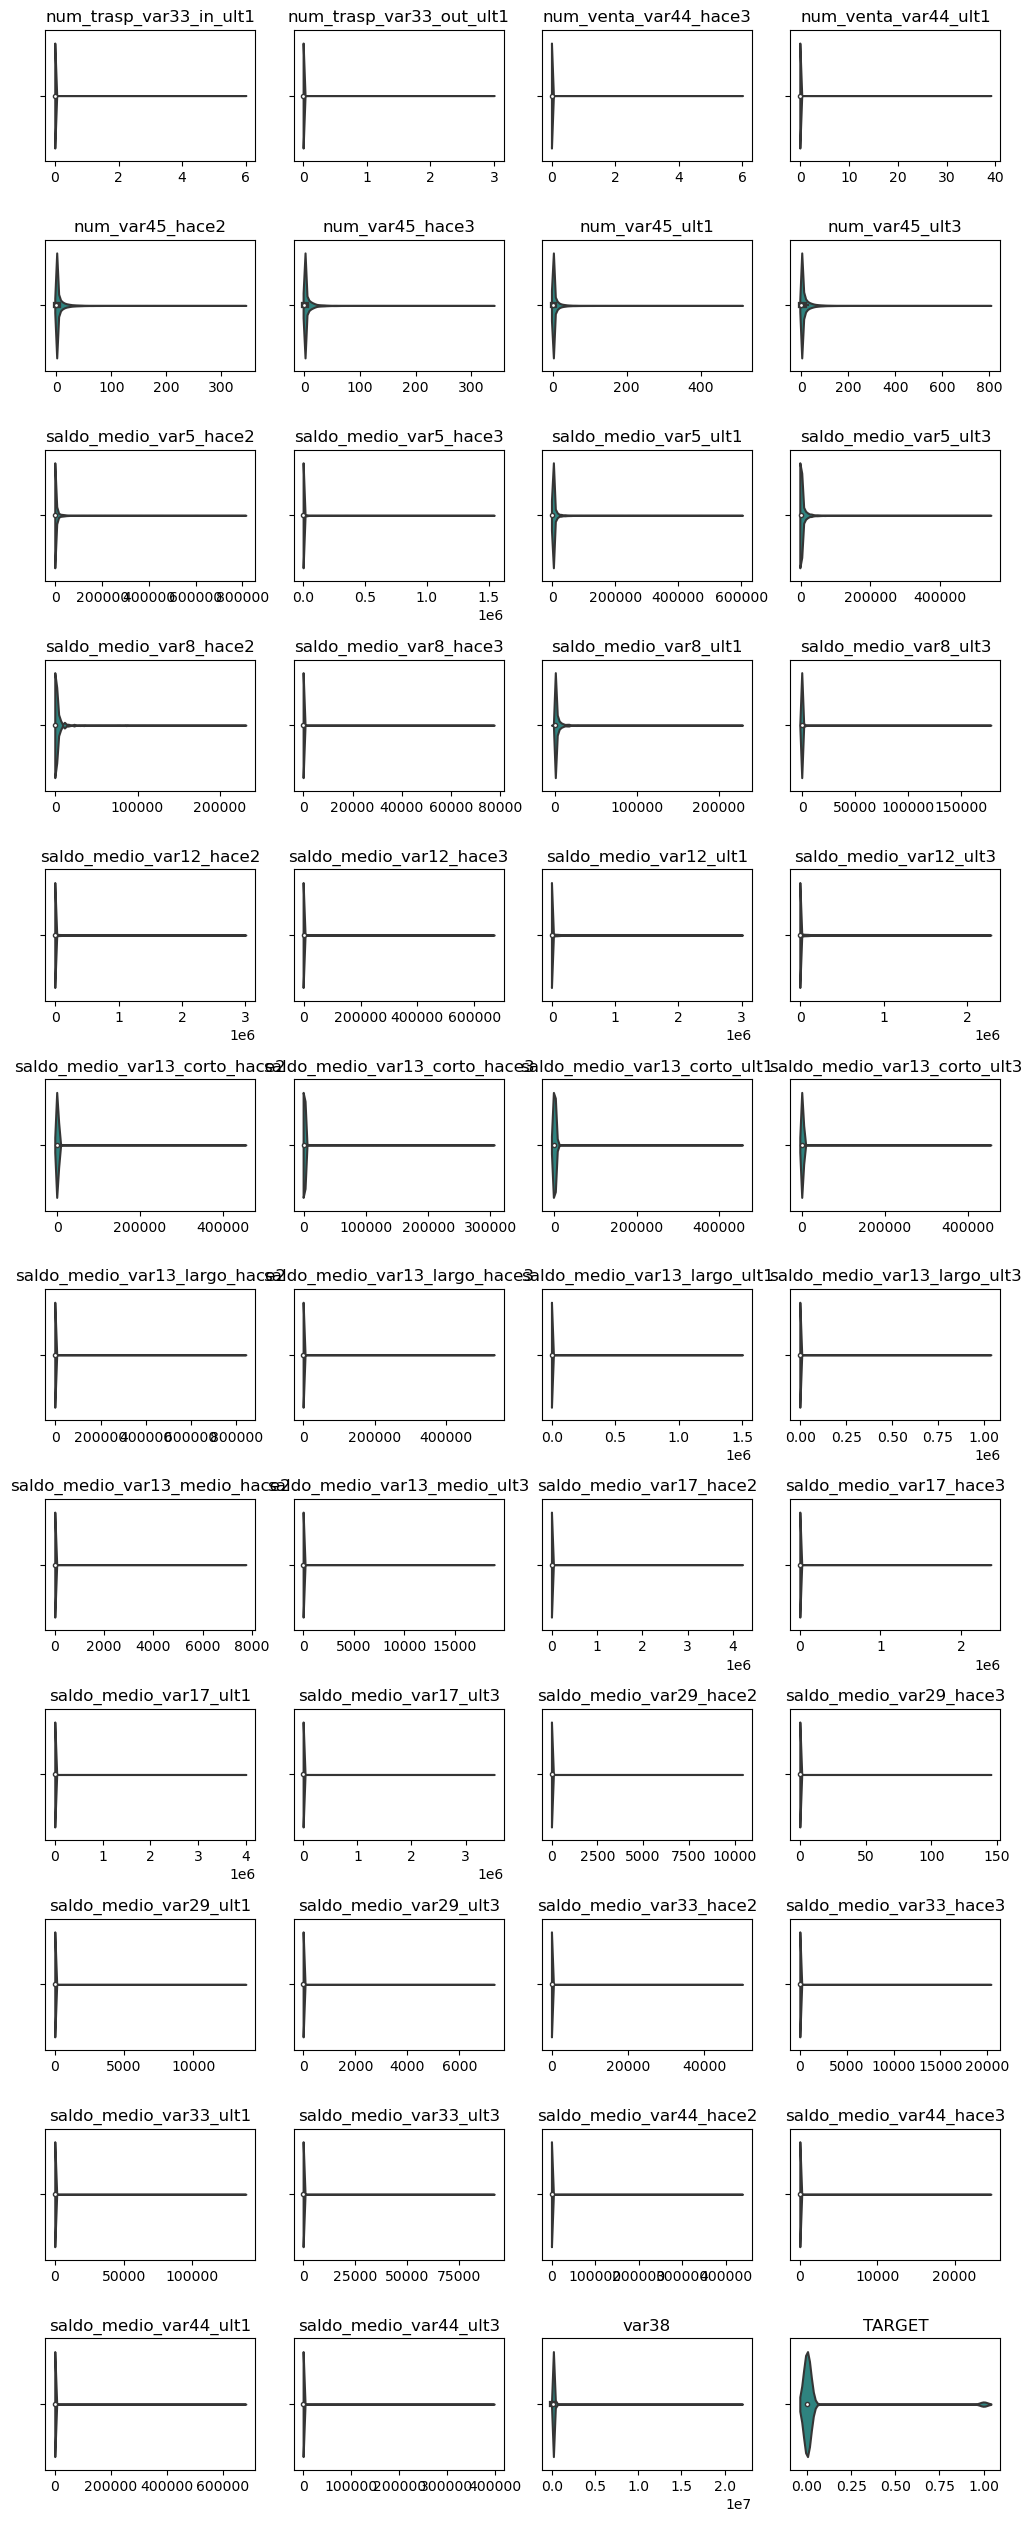

In [86]:
plt.figure(figsize=(10,27))
for i in range(0, len(num6)):
    plt.subplot(13,4,i+1)
    sns.violinplot(x=eda[num6[i]], palette='viridis')
    plt.title(num6[i], fontsize=12)
    plt.xlabel(' ')
    plt.tight_layout()

## Bivariate Analysis

### Kernel Density Plot

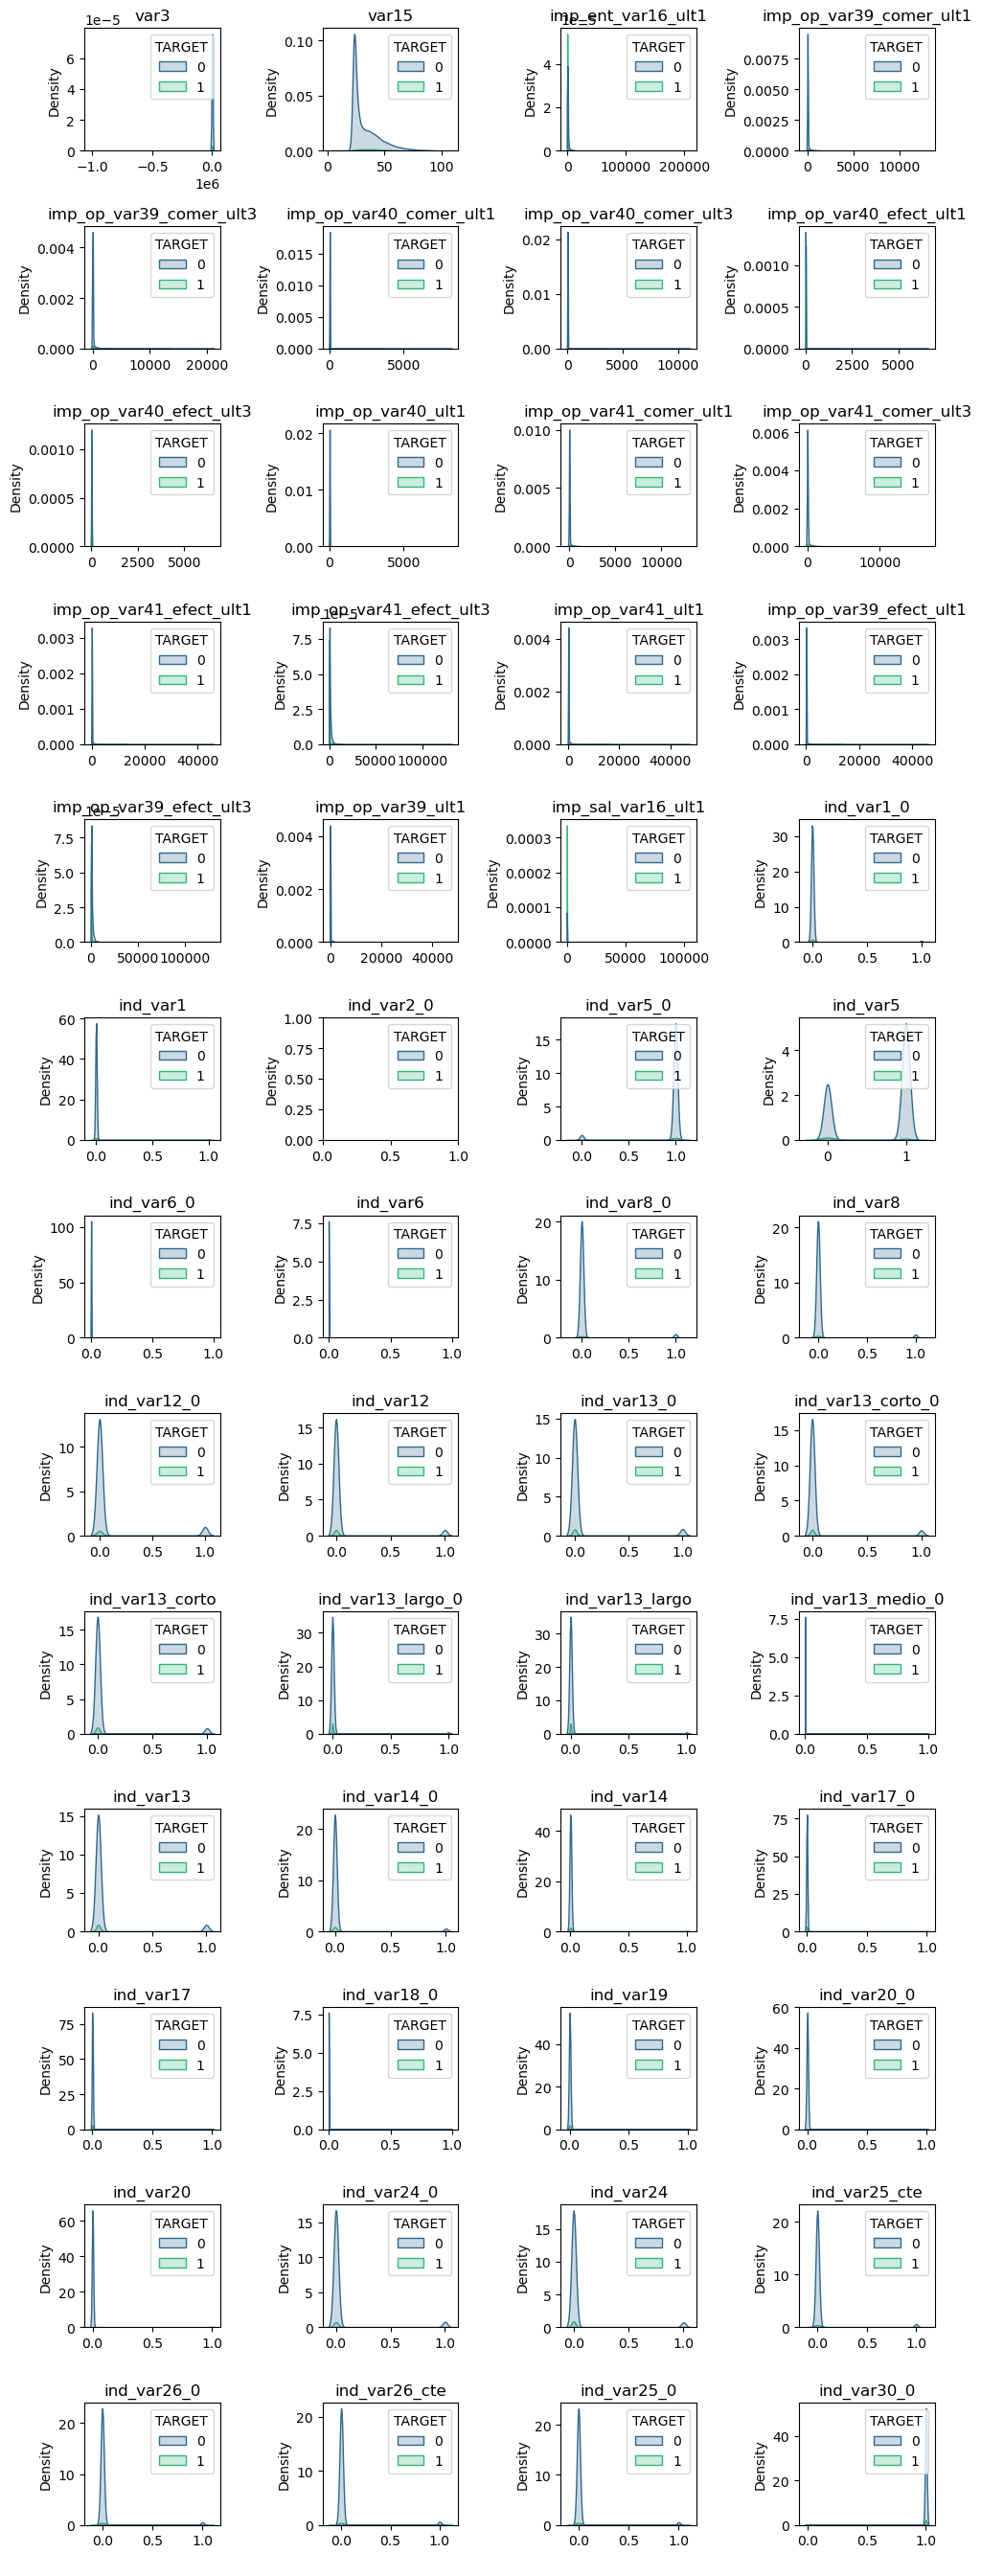

In [87]:
plt.figure(figsize=(10,27))
for i in range(0, len(num1)):
    plt.subplot(13,4,i+1)
    sns.kdeplot(x=eda[num1[i]], palette='viridis', shade=True, hue=eda['TARGET'])
    plt.title(num1[i], fontsize=12)
    plt.xlabel(' ')
    plt.tight_layout()

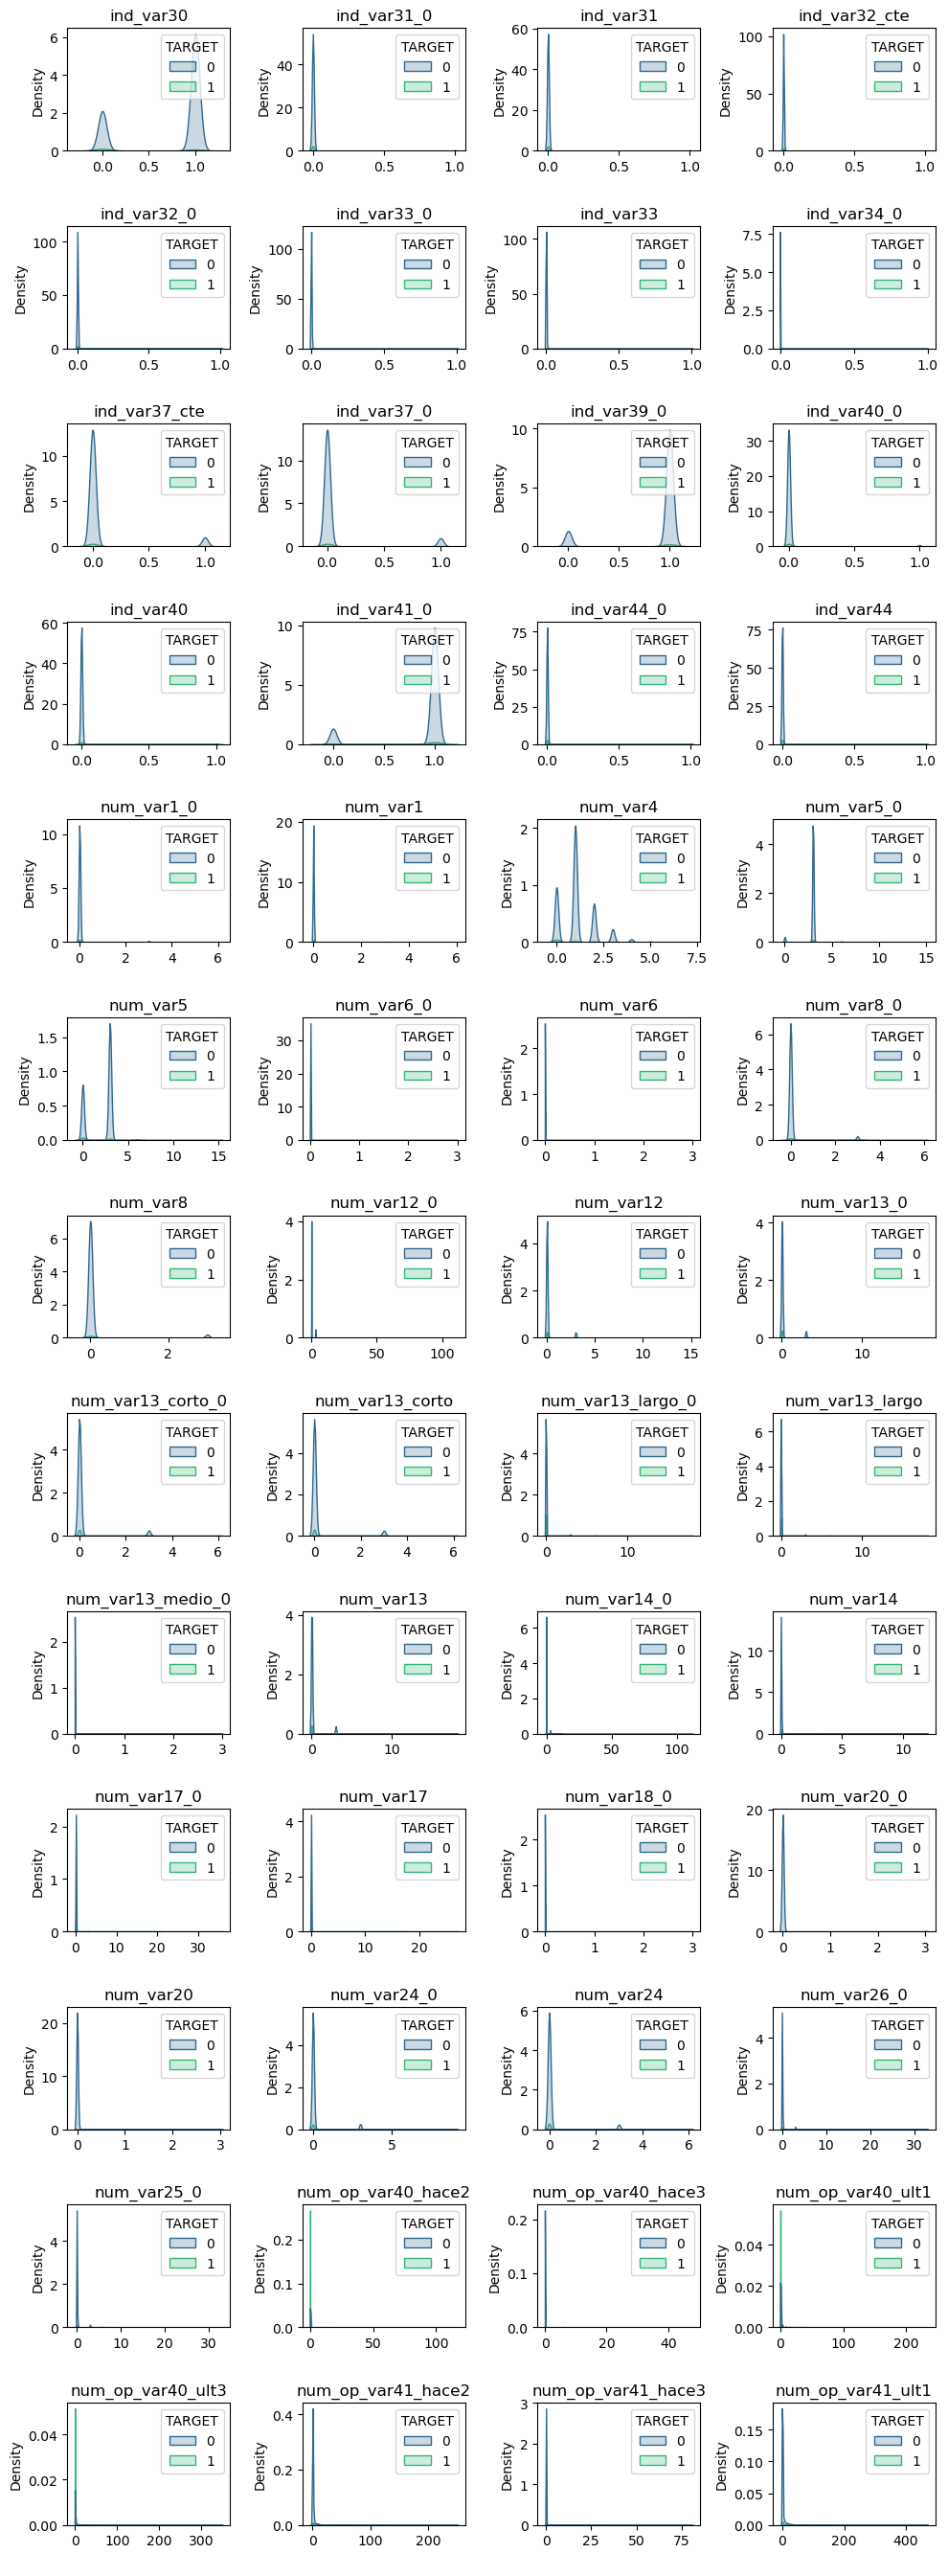

In [88]:
plt.figure(figsize=(10,27))
for i in range(0, len(num2)):
    plt.subplot(13,4,i+1)
    sns.kdeplot(x=eda[num2[i]], palette='viridis', shade=True, hue=eda['TARGET'])
    plt.title(num2[i], fontsize=12)
    plt.xlabel(' ')
    plt.tight_layout()

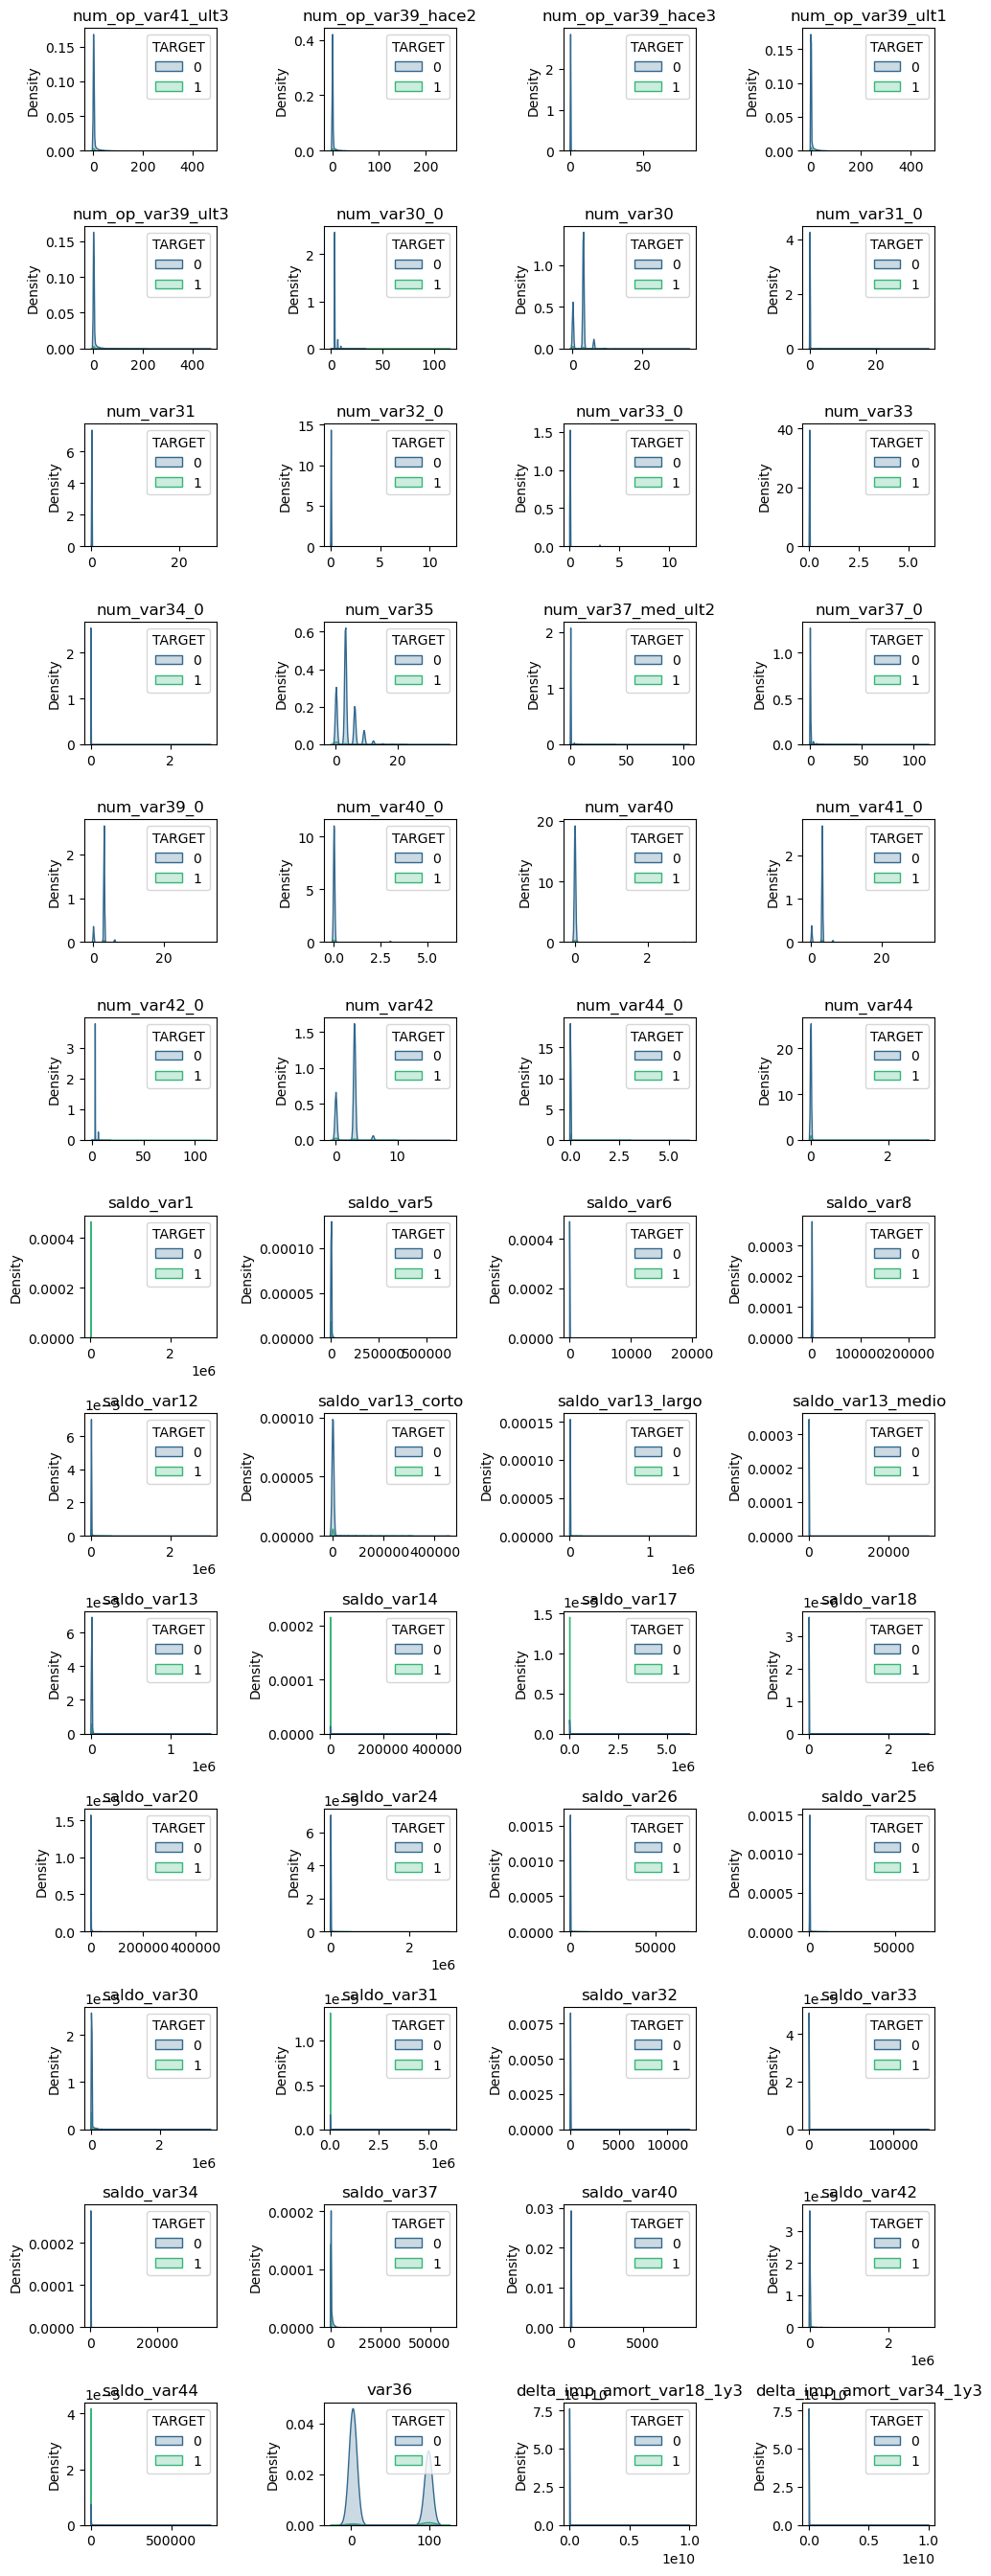

In [89]:
plt.figure(figsize=(10,27))
for i in range(0, len(num3)):
    plt.subplot(13,4,i+1)
    sns.kdeplot(x=eda[num3[i]], palette='viridis', shade=True, hue=eda['TARGET'])
    plt.title(num3[i], fontsize=12)
    plt.xlabel(' ')
    plt.tight_layout()

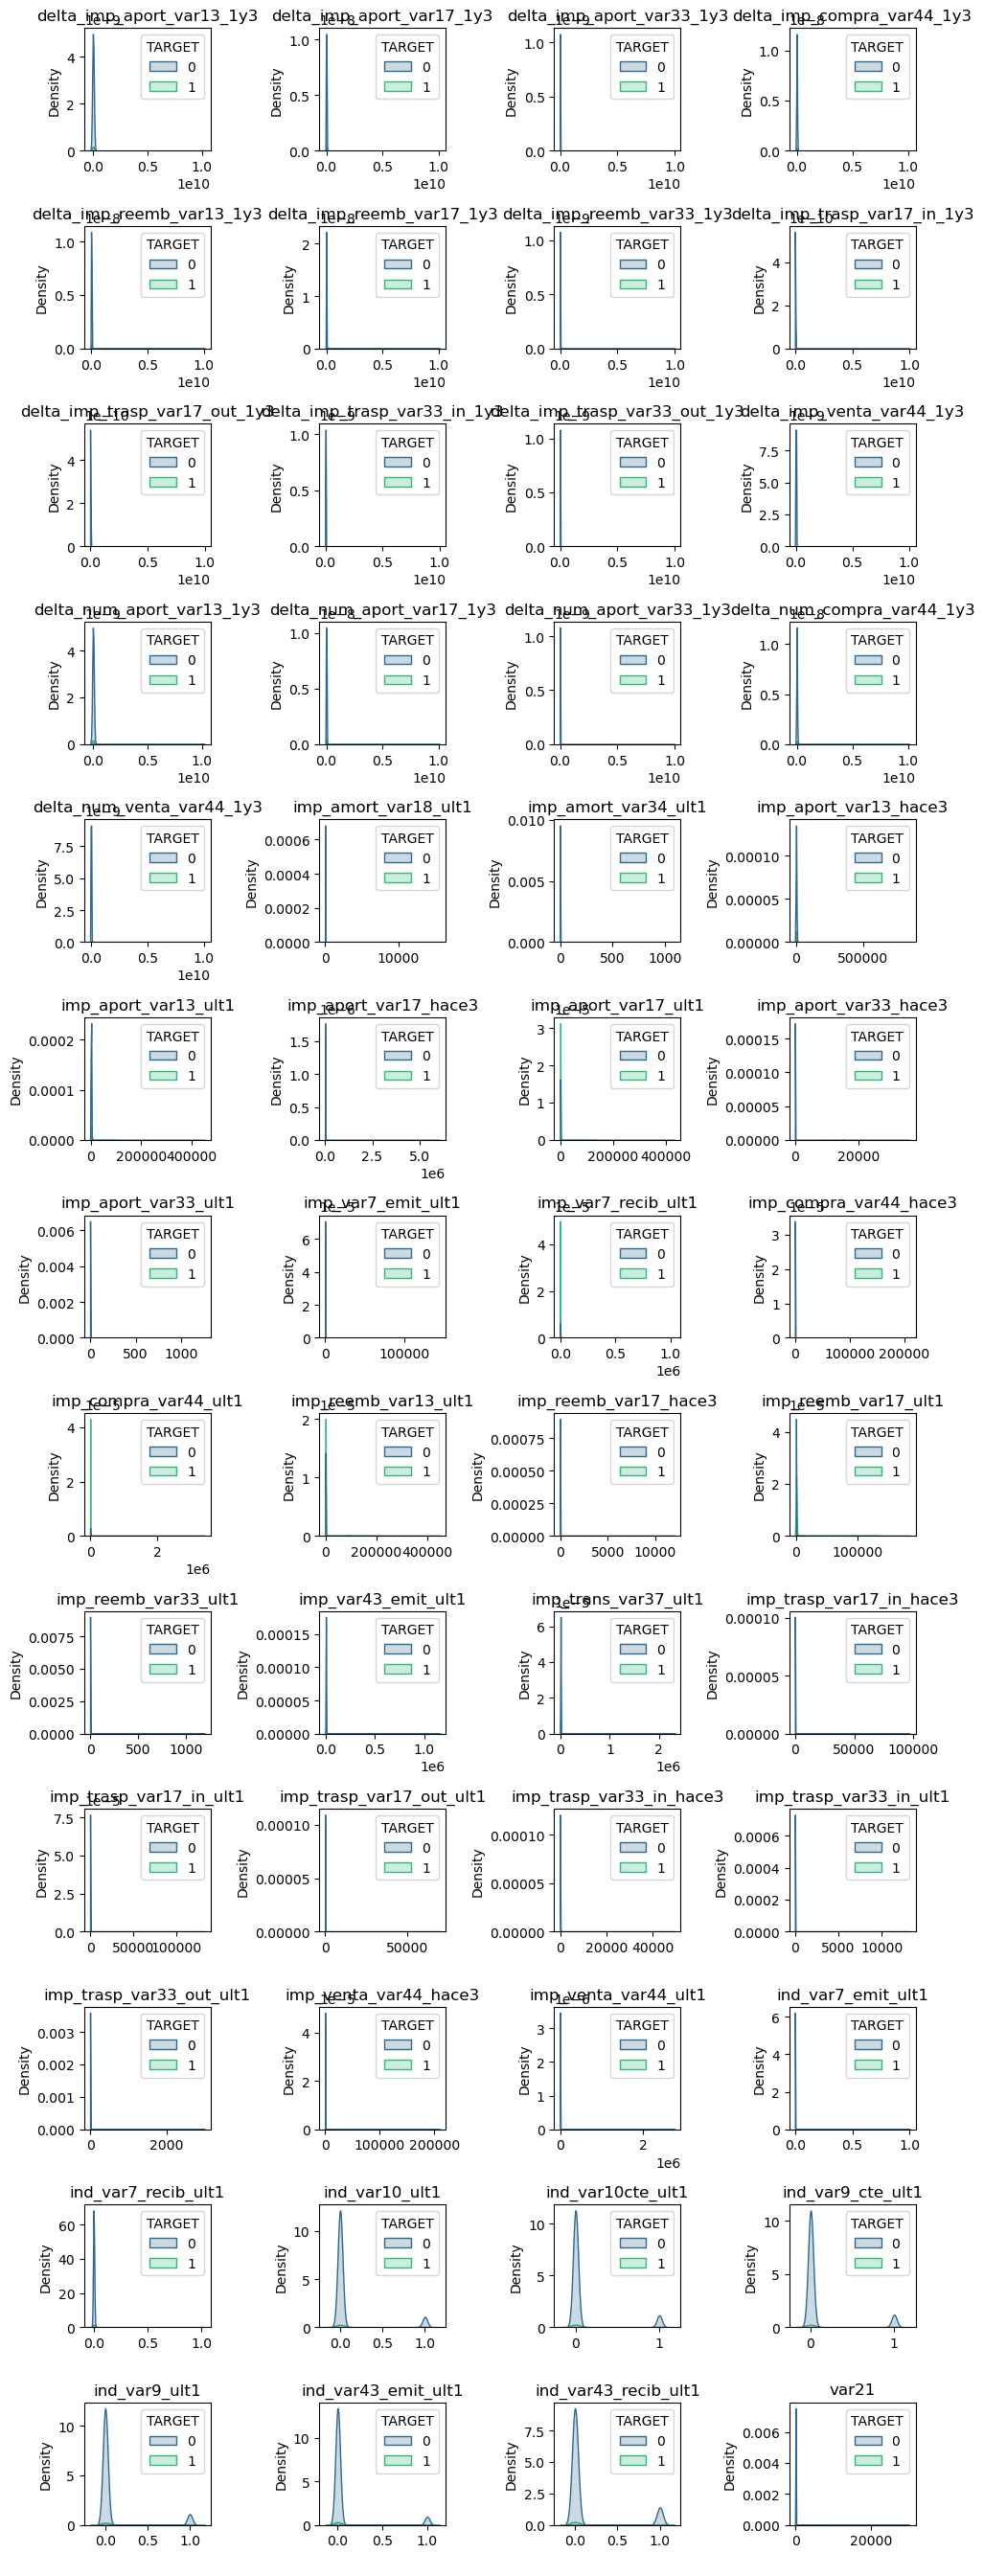

In [90]:
plt.figure(figsize=(10,27))
for i in range(0, len(num4)):
    plt.subplot(13,4,i+1)
    sns.kdeplot(x=eda[num4[i]], palette='viridis', shade=True, hue=eda['TARGET'])
    plt.title(num4[i], fontsize=12)
    plt.xlabel(' ')
    plt.tight_layout()

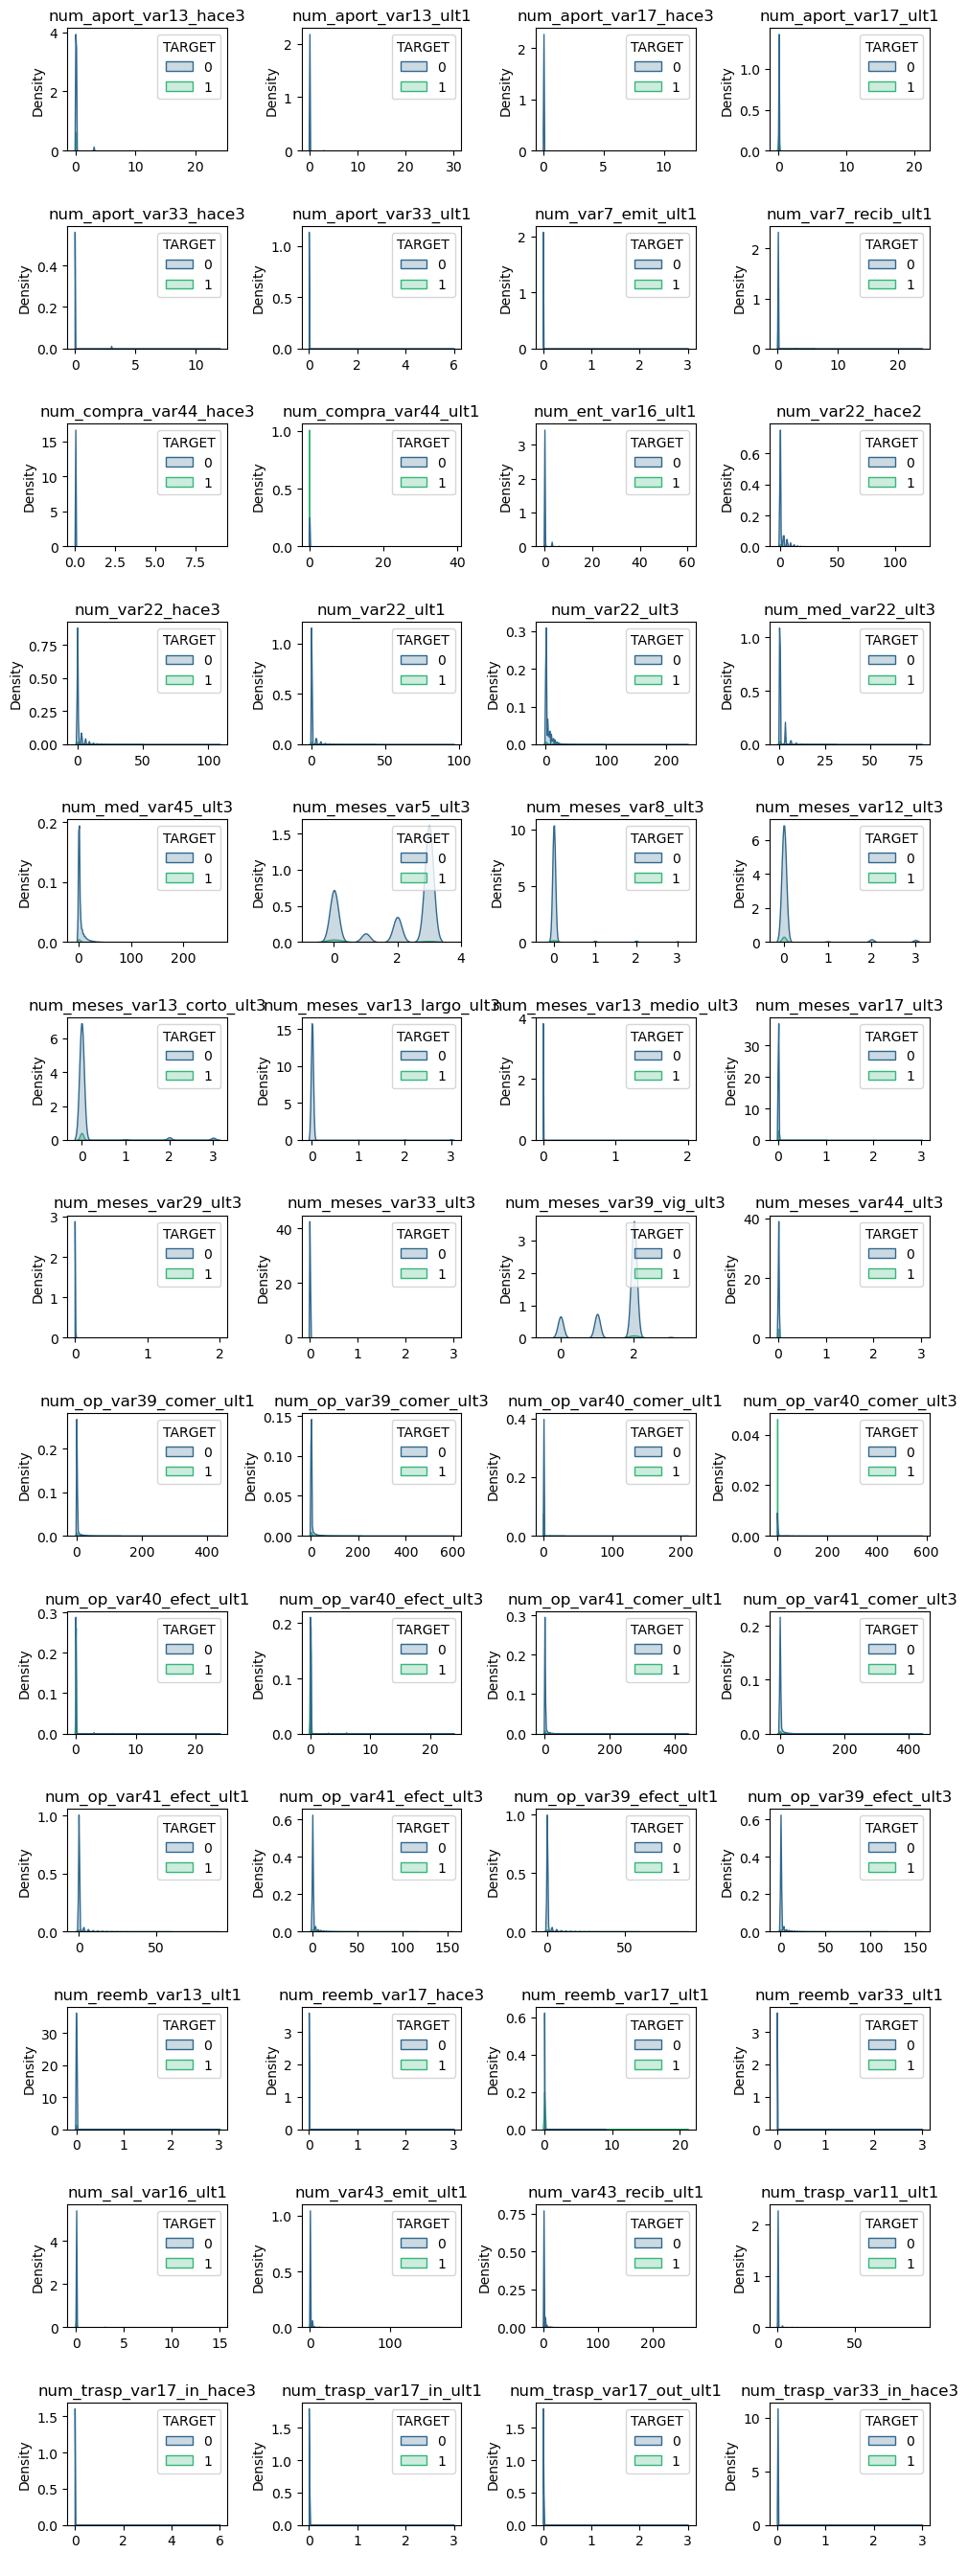

In [91]:
plt.figure(figsize=(10,27))
for i in range(0, len(num5)):
    plt.subplot(13,4,i+1)
    sns.kdeplot(x=eda[num5[i]], palette='viridis', shade=True, hue=eda['TARGET'])
    plt.title(num5[i], fontsize=12)
    plt.xlabel(' ')
    plt.tight_layout()

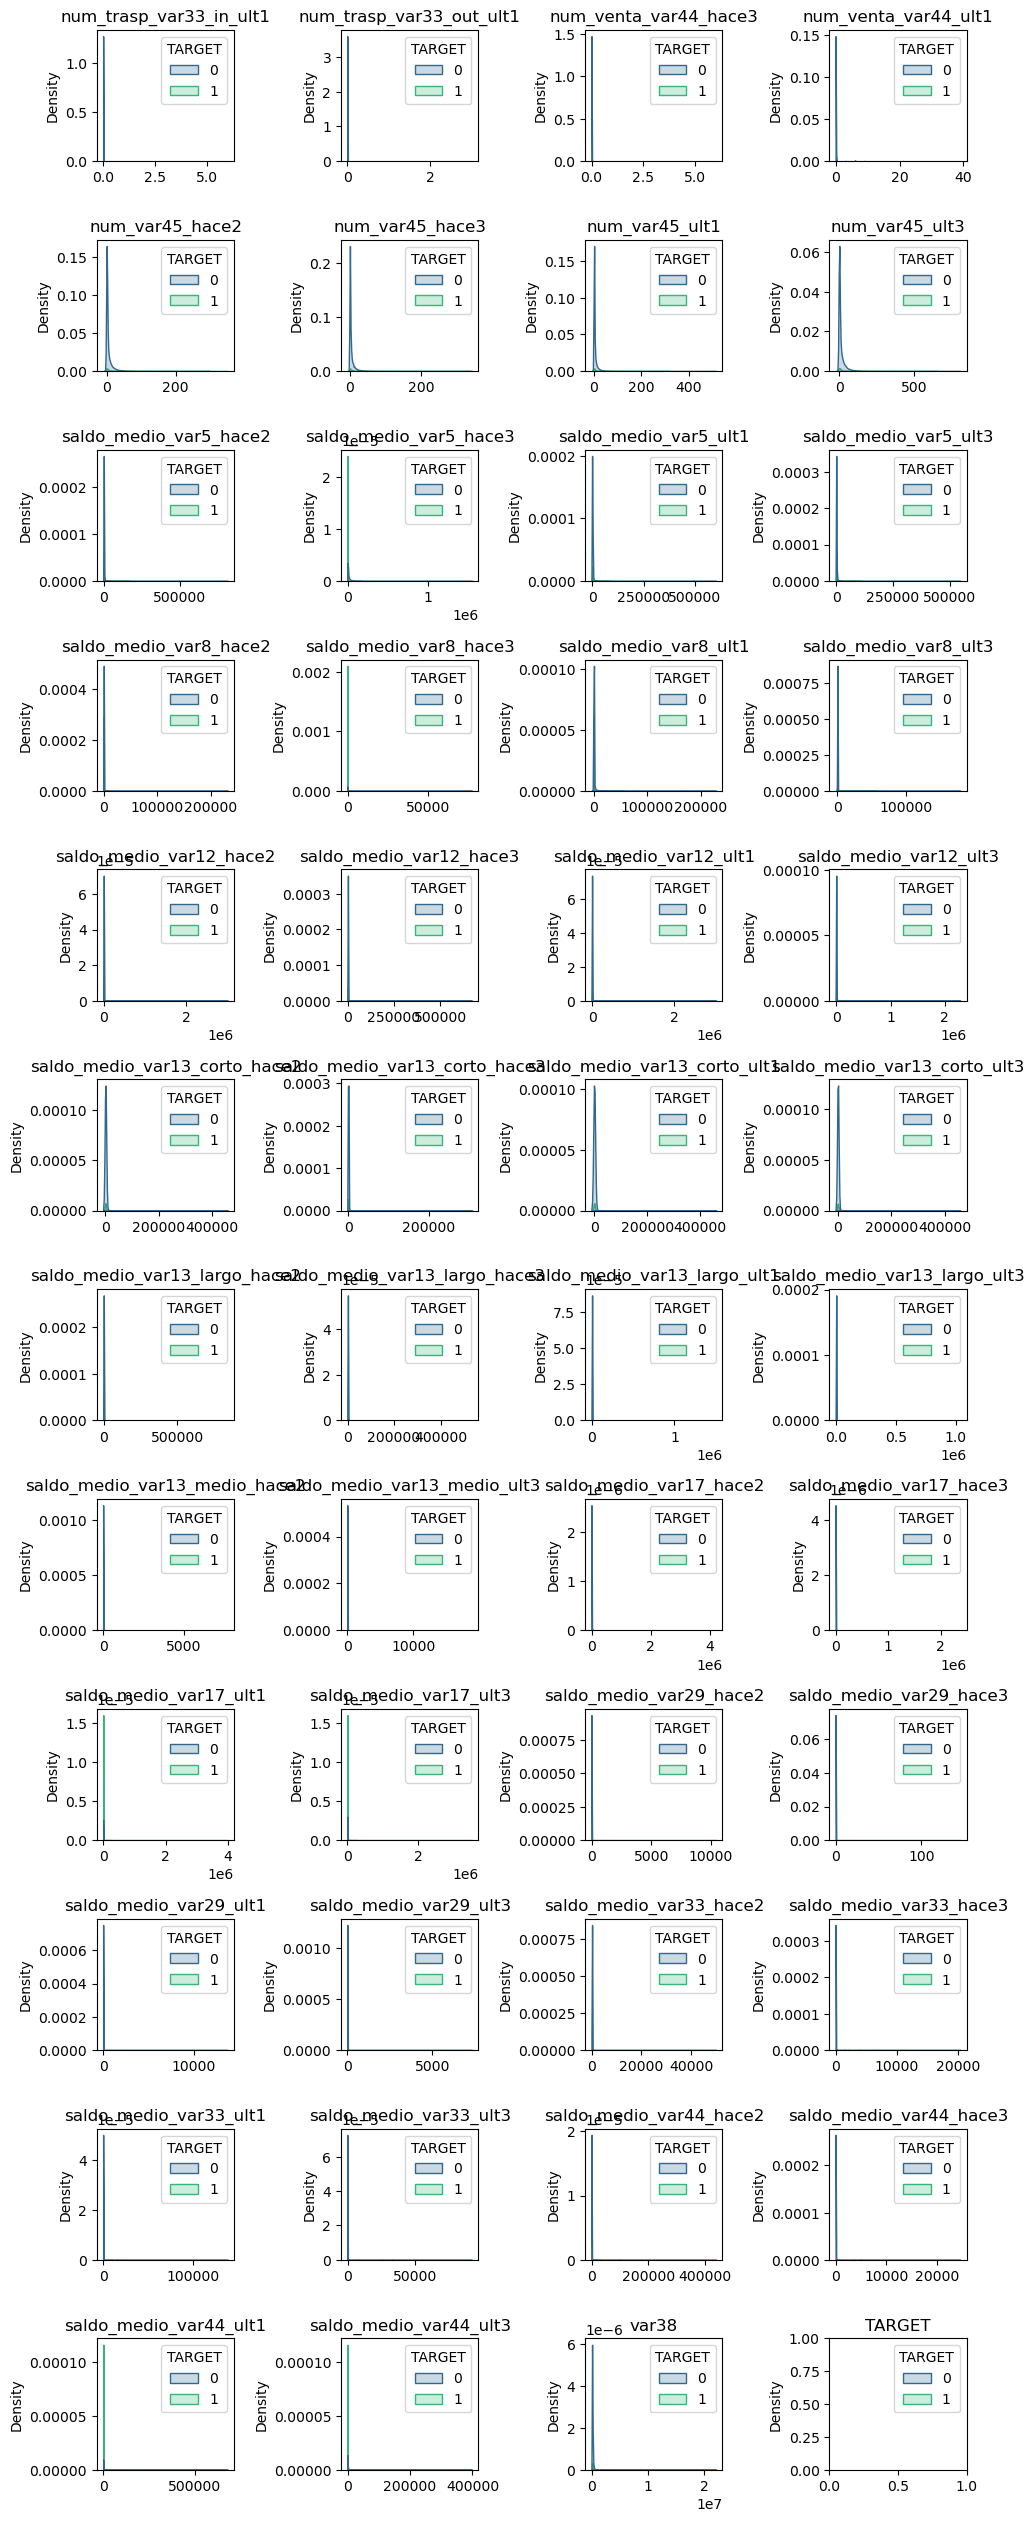

In [92]:
plt.figure(figsize=(10,27))
for i in range(0, len(num6)):
    plt.subplot(13,4,i+1)
    sns.kdeplot(x=eda[num6[i]], palette='viridis', shade=True, hue=eda['TARGET'])
    plt.title(num6[i], fontsize=12)
    plt.xlabel(' ')
    plt.tight_layout()

# Data Pre Processing

## Droping Highly Correlated Features

In [96]:
# create a square matrix with dimensions equal to the number of features.
cor_matrix = x.corr().abs()

# we are selecting the upper traingular (doesn't matter choose upper/lower, its the same result)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

# create drop list for highly correlated features, we set treshold = 0.7
drop_list = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]

# show drop_list
drop_list

['imp_op_var39_comer_ult3',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'ind_var8_0',
 'ind_var8',
 'ind_var12',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var13',
 'ind_var17',
 'ind_var20',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var25_0',
 'ind_var30',
 'ind_var31',
 'ind_var32_0',
 'ind_var33',
 'ind_var37_0',
 'ind_var40_0',
 'ind_var40',
 'ind_var41_0',
 'ind_var44',
 'num_var1_0',
 'num_var1',
 'num_var5_0',
 'num_var5',
 'num_var6_0',
 'num_var6',
 'num_var8_0',
 'num_var8',
 'num_var12_0',
 'num_var12',
 'num_var13_0',
 'num_var13_corto_0',
 'num_var13_corto',
 'num_var13_largo_0',
 'num_var13_largo',
 'num_var13_medio_0',
 'num_var13',
 'num_var14_0',
 'num_var14',
 'num_var17_0',
 'num_va

In [97]:
len(drop_list)

202

In [98]:
# drop multicol features
x = x.drop(drop_list, axis=1)
x.shape

(76020, 105)

## Train Test Split Dataset

In [99]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [100]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((53214, 105), (22806, 105), (53214,), (22806,))

In [101]:
print('Target Feature : ')
y.value_counts()

Target Feature : 


0    73012
1     3008
Name: TARGET, dtype: int64

## Feature Scaling

In [110]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [111]:
x_train.shape, x_test.shape

((53214, 105), (22806, 105))

# Modeling

In [112]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

## Build Model

In [114]:
model = Sequential()

# input layer
model.add(Dense(105,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training

In [115]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(x_test, y_test), 
          )

Epoch 1/25
208/208 [==============================] - 2s 7ms/step - loss: 0.2301 - val_loss: 0.1526
Epoch 2/25
208/208 [==============================] - 1s 4ms/step - loss: 0.1529 - val_loss: 0.1495
Epoch 3/25
208/208 [==============================] - 1s 5ms/step - loss: 0.1489 - val_loss: 0.1476
Epoch 4/25
208/208 [==============================] - 1s 4ms/step - loss: 0.1453 - val_loss: 0.1458
Epoch 5/25
208/208 [==============================] - 1s 5ms/step - loss: 0.1440 - val_loss: 0.1457
Epoch 6/25
208/208 [==============================] - 1s 7ms/step - loss: 0.1425 - val_loss: 0.1454
Epoch 7/25
208/208 [==============================] - 1s 5ms/step - loss: 0.1418 - val_loss: 0.1466
Epoch 8/25
208/208 [==============================] - 1s 4ms/step - loss: 0.1400 - val_loss: 0.1447
Epoch 9/25
208/208 [==============================] - 1s 4ms/step - loss: 0.1392 - val_loss: 0.1447
Epoch 10/25
208/208 [==============================] - 1s 5ms/step - loss: 0.1389 - val_loss: 0.1459

## Model Evaluation

<AxesSubplot:>

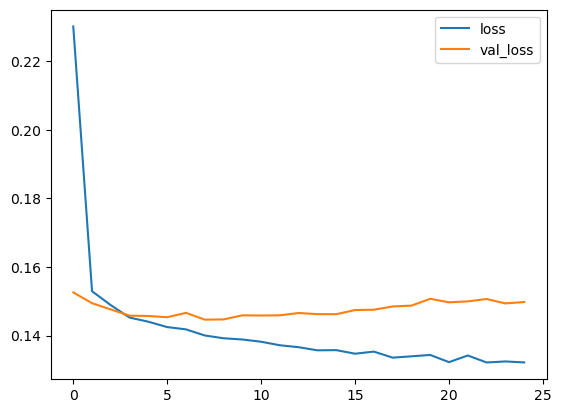

In [116]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [117]:
from sklearn.metrics import classification_report,confusion_matrix

predictions =(model.predict(x_test)>0.5).astype('int32')
print(classification_report(y_test,predictions))

713/713 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21867
           1       0.46      0.01      0.01       939

    accuracy                           0.96     22806
   macro avg       0.71      0.50      0.50     22806
weighted avg       0.94      0.96      0.94     22806

